# Exploratory data analysis

In this notebook we want to gain some more insight on the data.  
As a prelimiary description

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from gizathon_project.src.data_preprocessing.data_handlers import load_data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
df = load_data()

In [12]:
df.head(10)

,date,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,avg_wind_speed,avg_clouds
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,65.41,2.0,0.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,64.92,2.0,0.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,64.48,2.4,0.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,59.32,2.4,0.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,56.04,2.4,0.0
5,2015-01-01 05:00:00+01:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,53.63,2.4,0.0
6,2015-01-01 06:00:00+01:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,43.0,74.0,34.0,186.0,4397.0,20010.0,51.73,2.4,0.0
7,2015-01-01 07:00:00+01:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,43.0,72.0,35.0,189.0,3992.0,20377.0,51.43,2.4,0.0
8,2015-01-01 08:00:00+01:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,43.0,73.0,54.0,198.0,3629.0,20094.0,48.98,1.4,0.0
9,2015-01-01 09:00:00+01:00,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,43.0,74.0,743.0,198.0,3073.0,20637.0,54.20,1.4,0.0


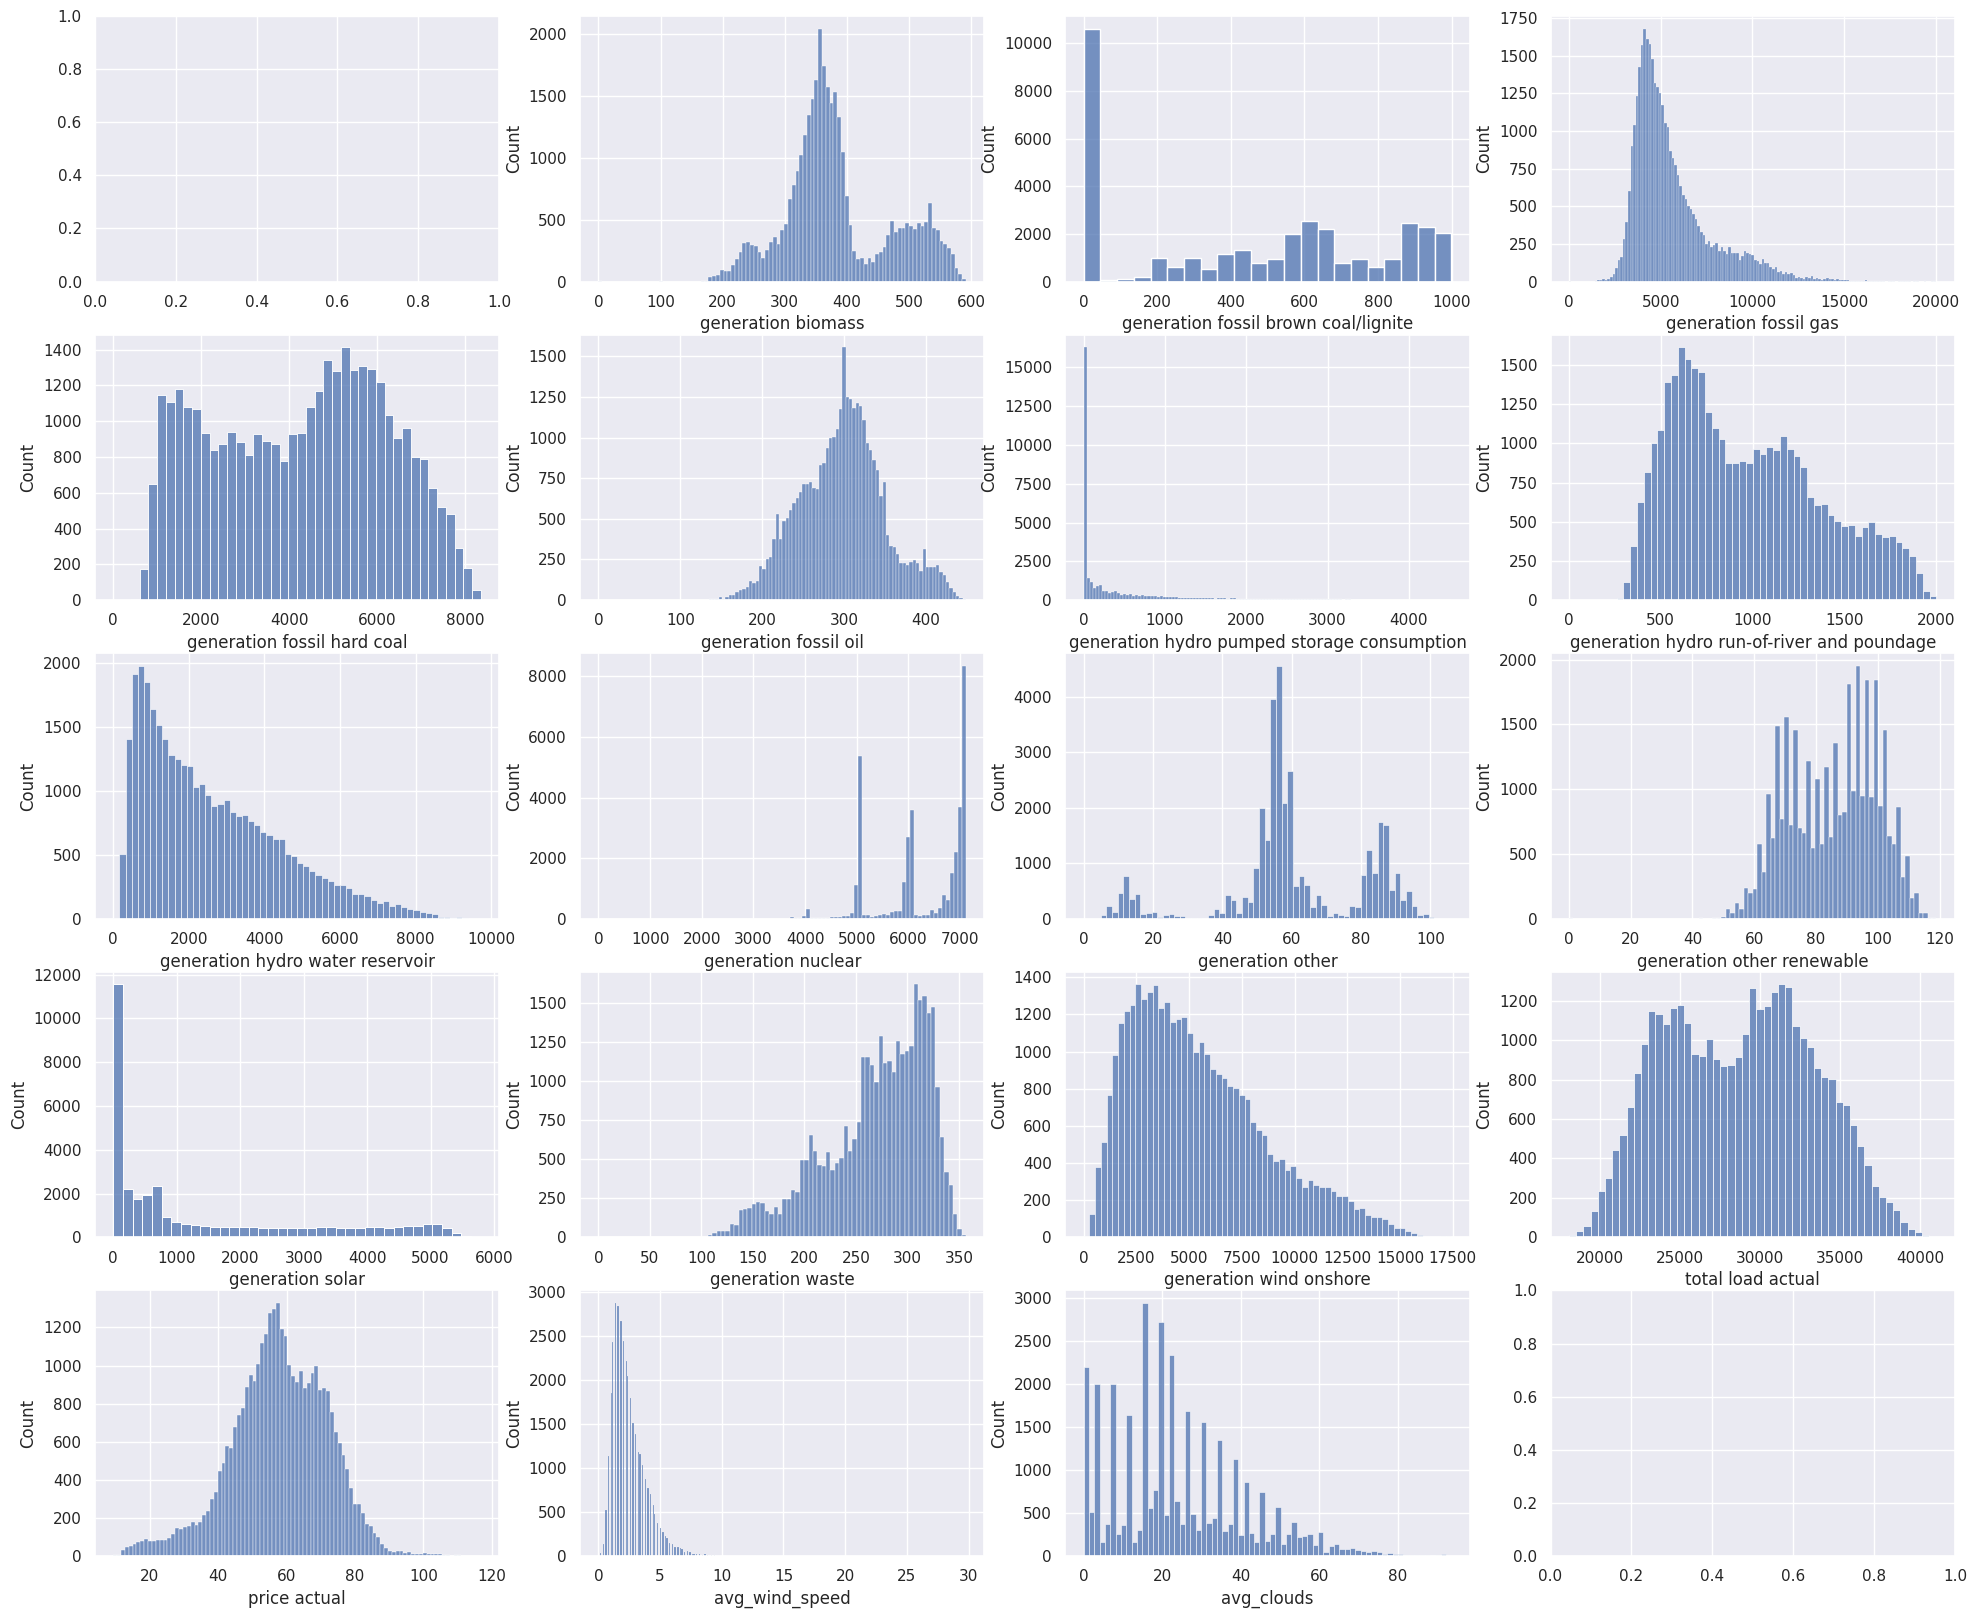

In [39]:
f, axes = plt.subplots(5, 4, figsize=(24, 20))
for i, col in enumerate(df.columns):
    if col == "date":
        continue
    sns.histplot(df[col], ax=axes[int(i // 4), int(i % 4)])

Except for the columns "total load actual", "price actual", "avg_wind_speed", "avg_clouds", each plot represents how much energy is generated from a specific source. "total load actual" is the energy demand; "price actual" is the electricity price, which is our target variable; "avg_wind_speed" is the average wind speed across 5 Spanish cities; "avg_clouds" is a the average of a measurement of how much the sky is covered across 5 Spanish cities.

We notice that some sources of energy have a very small impact on the overall production. For instance "generation other" is orders of magnitude smaller than "generation nuclear". Moreover some distributions have very high variance and a mode close to 0 (e.g. "generation solar"). This is due to the fact that these sources of energy are inactive for most of the time periods under consideration.   

We can look at the summary statistics by column to see which sources of energy contribute the most to the production of electricity and see their variability in this period.



In [19]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price actual,avg_wind_speed,avg_clouds
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.531343,448.094570,5622.700647,4256.531271,298.342417,475.582706,972.201902,2605.534123,6263.483430,60.226030,85.634326,1432.818546,269.418692,5464.980450,28698.281385,57.884023,2.470009,24.344057
std,85.346266,354.618269,2201.510984,1961.988937,52.519927,792.312704,400.712304,1835.175078,840.272333,20.238792,14.076948,1679.961733,50.218423,3213.586296,4575.828854,14.204083,1.356937,16.962859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,9.330000,0.000000,0.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1078.000000,5759.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.000000,49.347500,1.400000,12.000000
50%,367.000000,509.000000,4969.500000,4475.000000,300.000000,68.000000,906.000000,2165.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4849.500000,28902.000000,58.020000,2.200000,22.000000
75%,433.000000,757.000000,6429.000000,5839.000000,330.000000,616.000000,1250.000000,3758.000000,7025.000000,80.000000,97.000000,2579.000000,310.000000,7399.500000,32194.250000,68.010000,3.200000,34.400000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,116.800000,29.800000,93.600000


We can see that non renewables are more reliable sources of energy (in this period), as their median is generally speaking higher than their renewable counterparties with lower standard deviations. We also notice that onshore wind energy has very large 75 percentile, which suggests that while less eneegy is produces by wind, on average, there are days in which wind renewable eclipses the other sources of energy. This is an important fact, as the additional electricity produced does not always make it to the grid (depending on supply and demand).

We observe that the "date" column is a string. To capture as much information as possible about the time of the day, we replace this columns with three columns, one accounting for the current month, one for the day and one for the hour. The idea is to try and encode seasonality, for models without a notion of time (fully connected and random forest).

We see that the target variable "price actual" has a central tendency and a slighlty fatter tail on the left side.  


## Deeper dive into the target variable

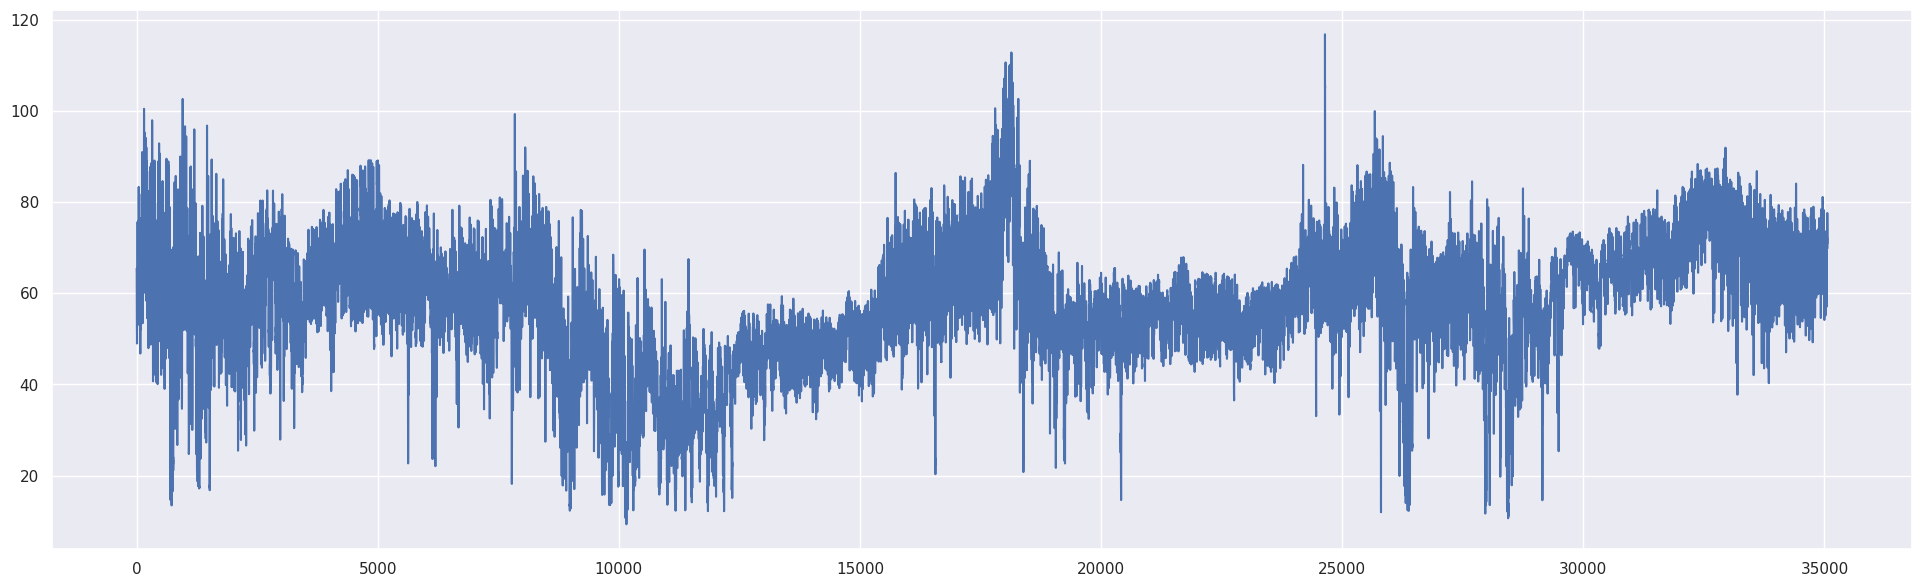

In [57]:
fig = plt.figure(figsize=(24, 7))
plt.plot(df["price actual"])

The price time series looks visually stationary in the period under consideration. We won't run a statistical test, as for our purposes this intuition is good enough.  

It is reasonable to expect the electicity price to display some periodic behaviour during the day, as people go form home to the office to home again. To confirm this, we plot the autocorrelation of "price actual" with lag 100

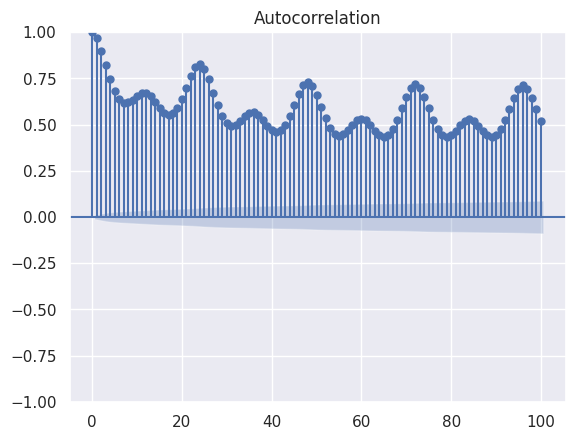

In [60]:
plot_acf(df['price actual'], lags=100)
plt.show()

We can indeed see that there is strong autocorrelation approximately every 24 hours. Motivated by this insight we are going to try a LSTM trained on the price in the last 24h as a baseline model.

We also observe that it takes time for the price to display meaninfull deviations from a short term mean. We did not have time to explore this fact, but it could have been useful to enhance the predictions.